# <span style="color:red">Market Basket Optimisation Dataset </span>

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid")
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df= pd.read_csv(r'C:\Users\Meriem\Desktop\AI\Market_Basket_Optimisation.csv', header=None)
df  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

## Data Preprocessing

In [4]:
df.fillna('',axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


## Visualization

**mineral water is the most frequent item, and cake is the least frequent.

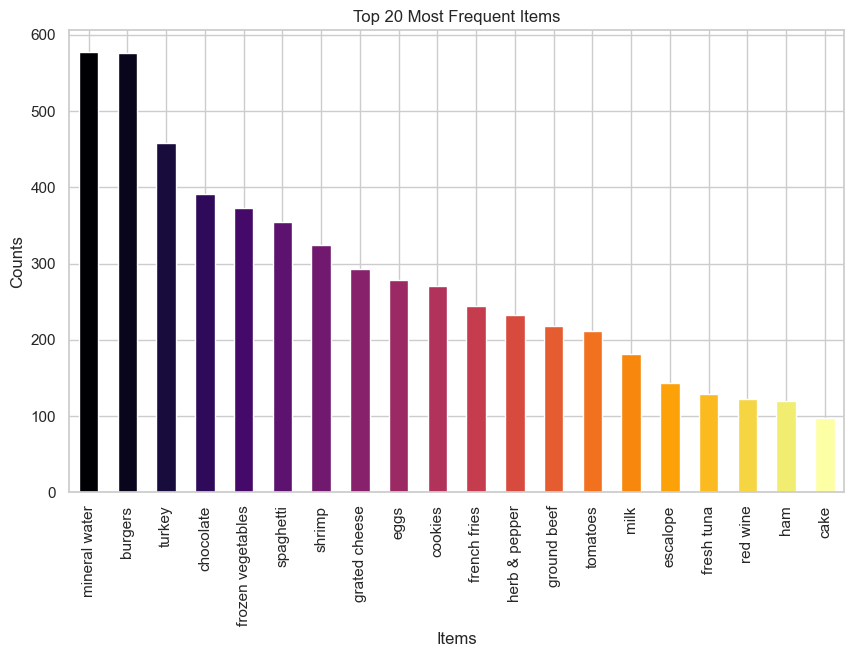

In [3]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
df[0].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

**converting the "Market_Basket_Optimisation" dataframe into a list of lists where each inner list represents a transaction.

In [5]:
df_list = df.to_numpy().tolist()
df_list
dataset = list()
for i in range(len(df_list)) :
    item = list()
    for j in df_list[i] :
        if pd.notna(j):
            item.append(j)
    dataset.append(item)

**using "TransactionEncoder" to convert the dataframe into a dataframe with True and False values for every item in the transaction.

In [6]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array

array([[False, False,  True, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True, False]])

In [7]:
final_df = pd.DataFrame(te_array,columns=te.columns_)
final_df.drop(columns=[''],axis=1,inplace=True)
final_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori algorithm

**extracting items, or groups of items that have a support greater than the minimum support.

In [15]:
frequent_itemsets_ap = apriori(final_df, min_support= 0.01 , use_colnames=True)
frequent_itemsets_ap

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(ground beef, mineral water, spaghetti)"
254,0.015731,"(milk, mineral water, spaghetti)"
255,0.010265,"(mineral water, olive oil, spaghetti)"


**"association_rules" is used to extract the association rules in our data.

In [17]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.2)

**People who buy herb and pepper often buy ground beef along with it.
ground beef is 2.9 times more likely to be bought along with mineral water and spaghetti.
frozen vegetables are 2.4 times more likely to be bought along with tomatoes.
people who buy shrimps often buy frozen vegetables along with it.

In [13]:
result = pd.DataFrame(rules_ap)
result.sort_values(by='lift',inplace=True,ascending=False)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
75,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
154,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
69,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930
67,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825
145,"(mineral water, milk)",(frozen vegetables),0.047994,0.095321,0.011065,0.230556,2.418737,0.006490,1.175757
...,...,...,...,...,...,...,...,...,...
74,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405
46,(ground beef),(eggs),0.098254,0.179709,0.019997,0.203528,1.132539,0.002340,1.029905
19,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
73,(green tea),(mineral water),0.132116,0.238368,0.031063,0.235116,0.986357,-0.000430,0.995748
